In [2]:
import visual_behavior.data_access.loading as loading
import visual_behavior.database as db

In [5]:
osid = 982980548
oeid = db.lims_query('select ID from ophys_experiments where ophys_session_id = {}'.format(osid))
oeid

984551228

In [6]:
dataset = loading.get_ophys_dataset(oeid)

In [7]:
dataset.behavior_movie_predictions 

{'groom_reach_with_contact': array([1.6314846e-06, 1.3306158e-06, 5.8090188e-07, ..., 2.5681899e-07,
        7.0512976e-07, 7.0935300e-08], dtype=float32),
 'groom_reach_without_contact': array([4.1038052e-06, 3.5862408e-06, 1.9140214e-06, ..., 2.6446953e-06,
        2.6310070e-06, 4.7132914e-07], dtype=float32),
 'lick_with_contact': array([2.6735075e-05, 2.5009449e-05, 1.2171467e-05, ..., 8.1381822e-06,
        1.7621825e-05, 4.8811139e-06], dtype=float32),
 'lick_without_contact': array([3.2511845e-05, 3.2124346e-05, 1.4967448e-05, ..., 7.8939156e-06,
        1.6259162e-05, 5.1949924e-06], dtype=float32),
 'no_contact': array([0.9998857 , 0.9998964 , 0.9999367 , ..., 0.99978644, 0.99988234,
        0.9999664 ], dtype=float32),
 'paw_contact': array([4.9365080e-05, 4.1516087e-05, 3.3581415e-05, ..., 1.9468095e-04,
        8.0472004e-05, 2.3051065e-05], dtype=float32)}

In [12]:
movie_predictions = pd.DataFrame(dataset.behavior_movie_predictions)
movie_predictions.index.name = 'frame_index'
movie_predictions['timestamps'] = dataset.behavior_movie_timestamps[:len(movie_predictions)] #length check will trim off spurious timestamps at the end
movie_predictions

cannot query specimen driver line: can't adapt type 'numpy.int64'
cannot query specimen reporter line: can't adapt type 'numpy.int64'


,groom_reach_with_contact,groom_reach_without_contact,lick_with_contact,lick_without_contact,no_contact,paw_contact,timestamps
frame_index,,,,,,,
0,1.631485e-06,4.103805e-06,0.000027,0.000033,0.999886,0.000049,0.14055
1,1.330616e-06,3.586241e-06,0.000025,0.000032,0.999896,0.000042,0.16326
2,5.809019e-07,1.914021e-06,0.000012,0.000015,0.999937,0.000034,0.16595
3,5.257563e-07,1.800797e-06,0.000016,0.000022,0.999936,0.000024,0.19901
4,1.367007e-06,3.583541e-06,0.000022,0.000027,0.999900,0.000046,0.23252
...,...,...,...,...,...,...,...
135867,2.569934e-07,3.472477e-06,0.000011,0.000008,0.999521,0.000457,4529.24394
135868,5.999602e-08,5.067973e-07,0.000003,0.000002,0.999951,0.000043,4529.27732
135869,2.568190e-07,2.644695e-06,0.000008,0.000008,0.999786,0.000195,4529.31056


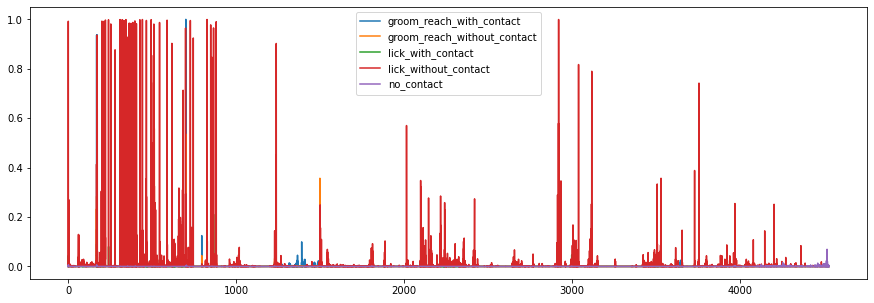

In [18]:
fig,ax=plt.subplots(figsize=(15,5))
cols_to_plot = [col for col in movie_predictions.columns if col not in ['timestamps', 'no_contact']]
for col in cols_to_plot:
    ax.plot(
        movie_predictions['timestamps'],
        movie_predictions[col]
    )
ax.legend(movie_predictions.columns)